---
## Modelling
---

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv('data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


## Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [20]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score,roc_auc_score,roc_curve

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (10954, 61)
X_test shape: (3652, 61)
y_train shape: (10954,)
y_test shape: (3652,)


In [9]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

### Evaluation
Now let's evaluate how well this trained model is able to predict the values of the test dataset.

We are going to use 3 metrics to evaluate performance:

- Accuracy = the ratio of correctly predicted observations to the total observations 
- Precision = the ability of the classifier to not label a negative sample as positive 
- Recall = the ability of the classifier to find all the positive samples

The reason why we are using these three metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.
If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.
As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.
This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

In [12]:
y_pred = model.predict(X_test)
print('ACCURACY SCORE of Random Forest Classifier Model is:', accuracy_score(y_test, y_pred))

ACCURACY SCORE of Random Forest Classifier Model is: 0.9030668127053669


In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3281,    5],
       [ 349,   17]], dtype=int64)

In [17]:
y.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

True positives: 17
False positives: 5
True negatives: 3281
False negatives: 349

Accuracy: 0.9030668127053669
Precision: 0.7727272727272727
Recall: 0.04644808743169399


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.77      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.84      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652




AUC: 0.6647887710405795


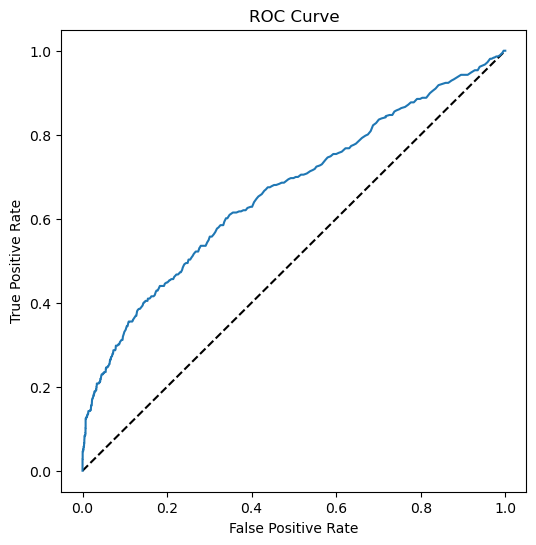

In [21]:
y_scores_RF = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

- Looking at the true negatives, we have 3281 out of 3286. This is great!

- Looking at the false negatives, 349 is too high.

- Looking at false positives, we can see there are only , quite good.

- With the true positives, we correctly identify 22 of these 393, which is very poor.

- Looking at the accuracy score, this is very misleading, looking at the precision score and recall score, this shows us a score of 0.90 which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model.

## Model Understanding

Feature importances indicate the importance of a feature within the predictive model.

In [23]:
feature_importances = pd.DataFrame({'features': X_train.columns,'importance': model.feature_importances_}).sort_values(by='importance', 
                                                                                                                          ascending=True).reset_index()

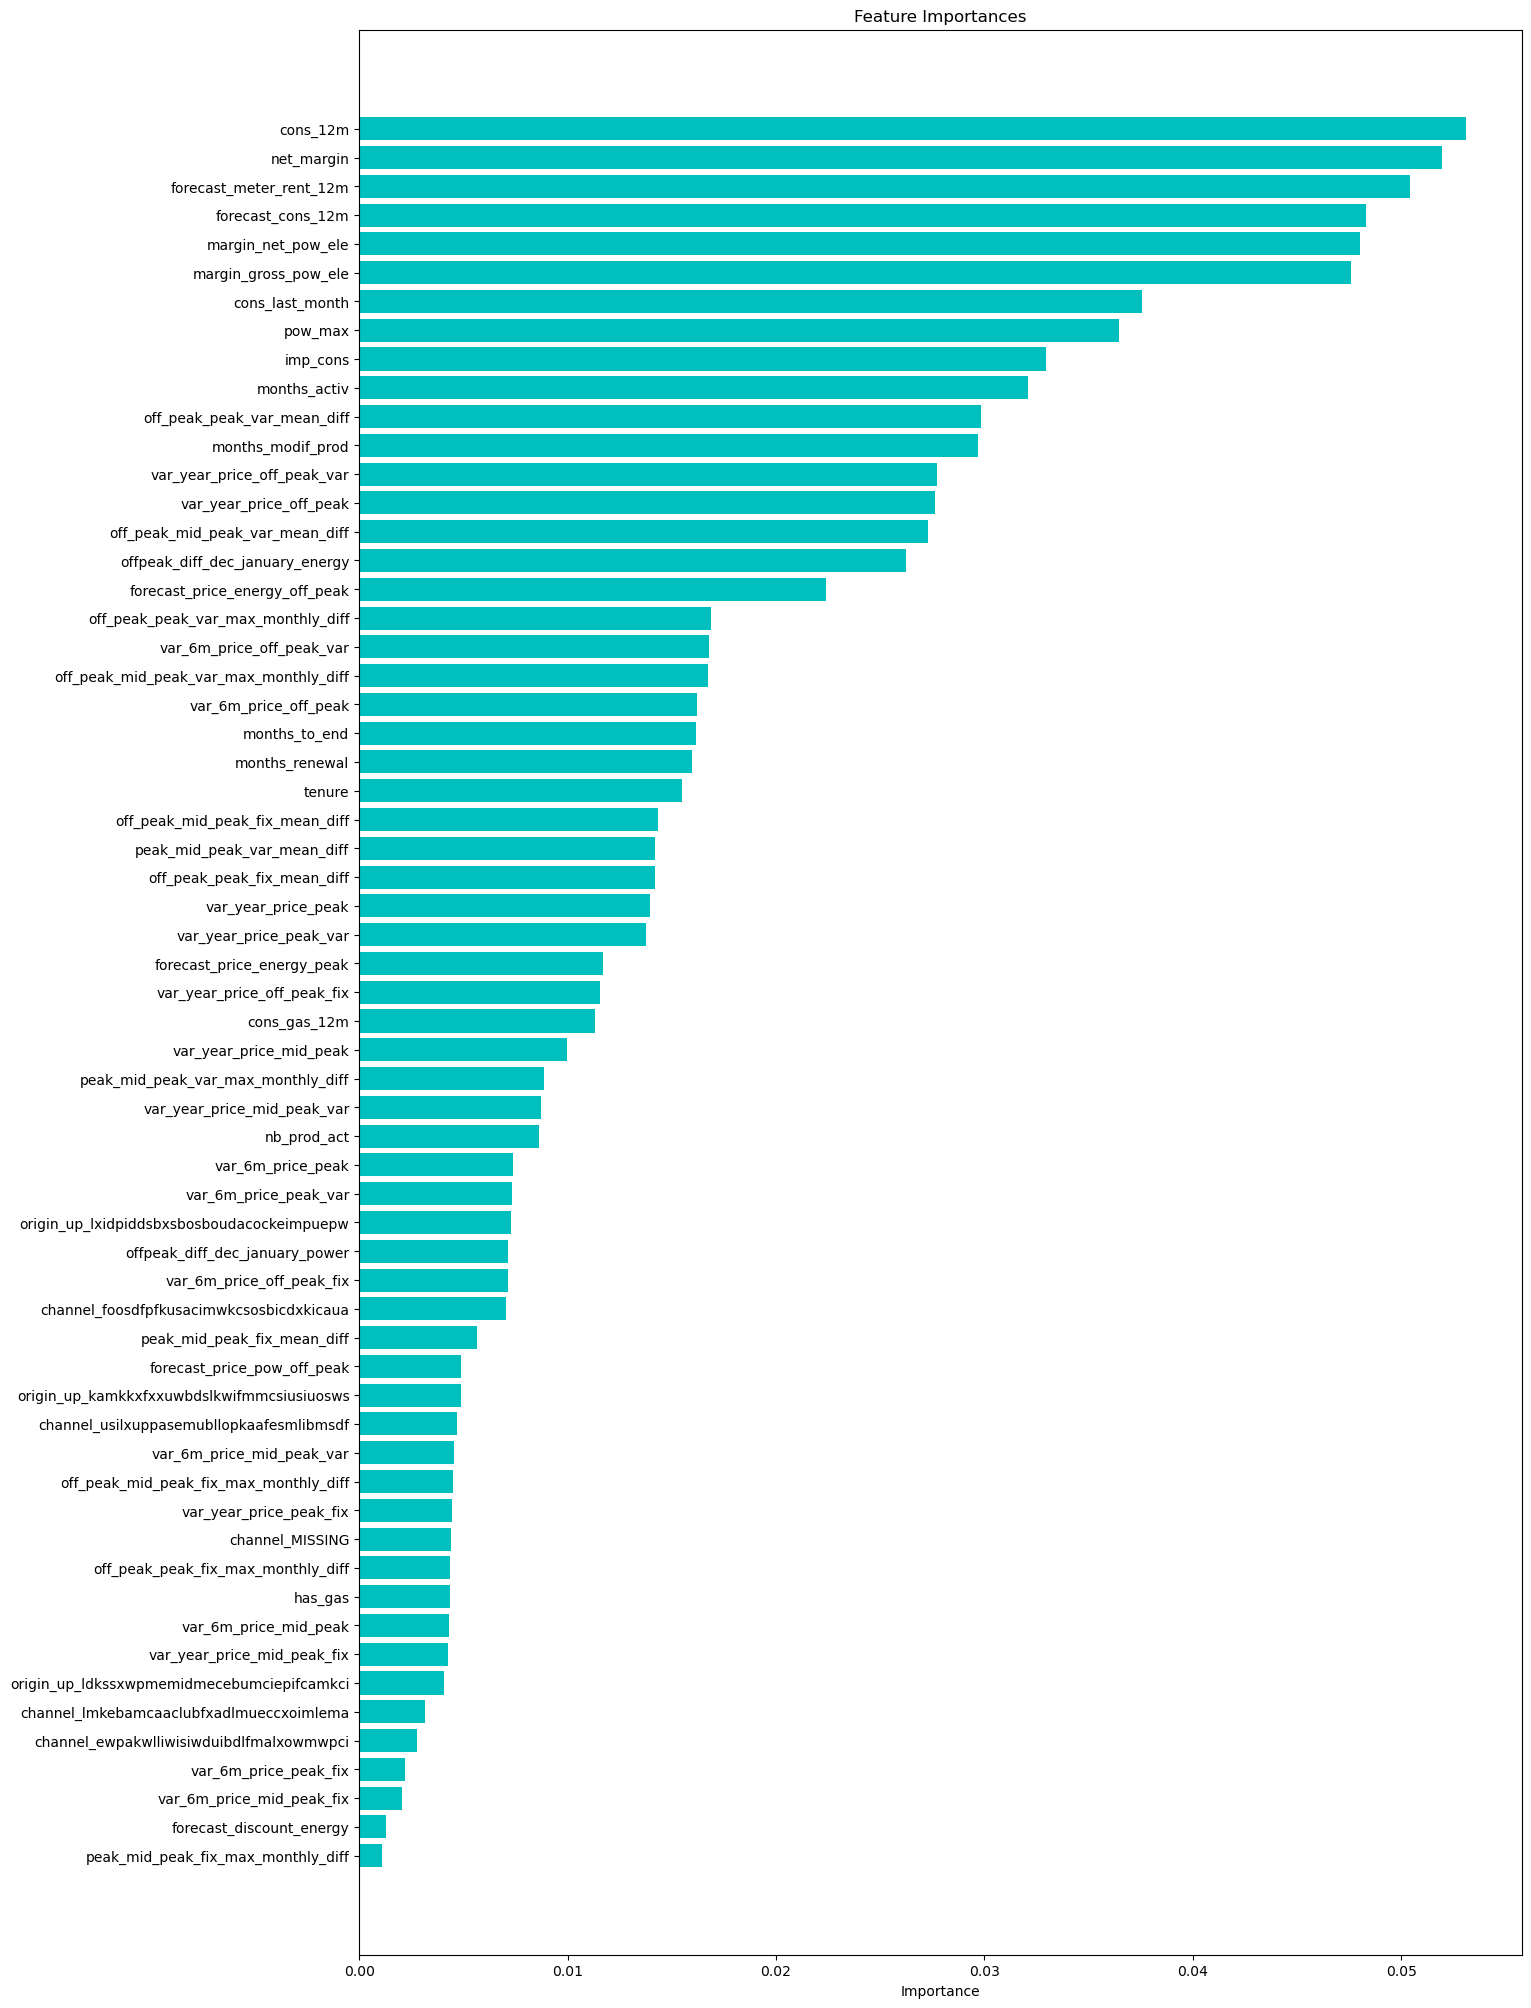

In [24]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='c', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [25]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [26]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [27]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

In [28]:
#import pickle
# Save the model as a pickle file
# filename = 'powerco_churn_model.pkl'
# pickle.dump(model, filename)

### Since our dataset is imbalance ,so we can try SMOTE technique.

In [22]:
y.value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [30]:
y.value_counts()

churn
1    13187
0    13187
Name: count, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state =1)

In [32]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [33]:
y_pred = model.predict(X_test)
print('ACCURACY SCORE of Random Forest Classifier Model after SMOTE technique is:', accuracy_score(y_test, y_pred))

ACCURACY SCORE of Random Forest Classifier Model after SMOTE technique is: 0.9507109004739337


In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2659,   26],
       [ 234, 2356]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2685
           1       0.99      0.91      0.95      2590

    accuracy                           0.95      5275
   macro avg       0.95      0.95      0.95      5275
weighted avg       0.95      0.95      0.95      5275



In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")

True positives: 2356
False positives: 26
True negatives: 2659
False negatives: 234

Accuracy: 0.9507109004739337
Precision: 0.9890848026868178
Recall: 0.9096525096525097


### we are getting a good accuracy score of 95% after using SMOTE technique.